### <center>  Deep Learning and Object Recognition </center>
### <center>  Lewison Choo | 2102290J </center>

## <font color= maroon>  Import Libraries

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,\
                                    BatchNormalization, AveragePooling2D, LeakyReLU, UpSampling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## <font color= maroon>  Set to Utilise GPU

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.set_visible_devices(physical_devices[0], 'GPU')

## <font color= maroon>  Data Intake

### 1. Load the CIFAR-10 dataset

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


##  <font color= maroon> Data Exploration

### 1. Check the shape of both training and testing data

In [6]:
print ("X-Train Shape:", x_train.shape)
print ("Y-Train Shape:", y_train.shape)
print ("X-Test Shape:", x_test.shape)
print ("Y-Test Shape:", y_test.shape)

X-Train Shape: (50000, 32, 32, 3)
Y-Train Shape: (50000, 1)
X-Test Shape: (10000, 32, 32, 3)
Y-Test Shape: (10000, 1)


#### Take-aways:
- The shape of the data retrieved is correct and same as what is described on the website

### 2. Check the number of classes

In [7]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


### 3. Check the maximum and minimum value of the pixel that forms the image

In [8]:
print("Maximum Pixel:", np.max(x_train))
print("Minimum Pixel:", np.min(x_train))

Maximum Pixel: 255
Minimum Pixel: 0


#### Take-aways: 
- The minimum pixel value is 0 and the maximum pixel value is 255

### 4. Visualise the data

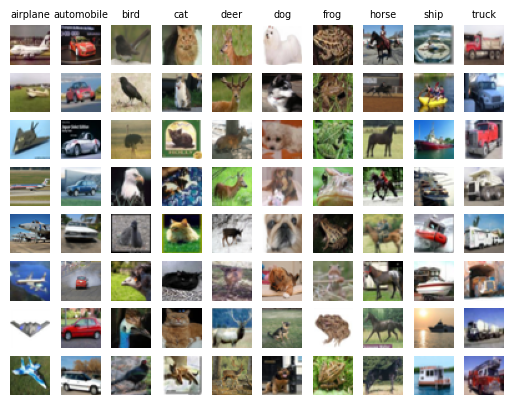

In [9]:
# Number of examples you want to see from each class
examples_per_class = 8 

# Define the list of classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

# Loop over each class and randomly select examples to visualize
for cls, cls_name in enumerate(class_names):
    
    # Get the indices of all training examples belonging to the current class
    idxs = np.where(cls == y_train)

    # Randomly select `examples_per_class` examples from the current class
    idxs = np.random.choice(idxs[0], examples_per_class, replace=False)

    # Loop over the selected examples and display them in a grid
    for i, idx in enumerate(idxs):

        # Compute the subplot index for the current example
        subplot_idx = i * num_classes + cls + 1

        # Create a subplot for the current example
        plt.subplot(examples_per_class, num_classes, subplot_idx)

        # Display the current example and turn off the axis labels
        plt.imshow(x_train[idx].astype('uint8'), cmap='gray')
        plt.axis('off')

        # If this is the first example of the current class, add the class name as the title
        if i == 0:
          plt.title(cls_name, fontsize=7)

### 5. Check the Distribution in Training Dataset

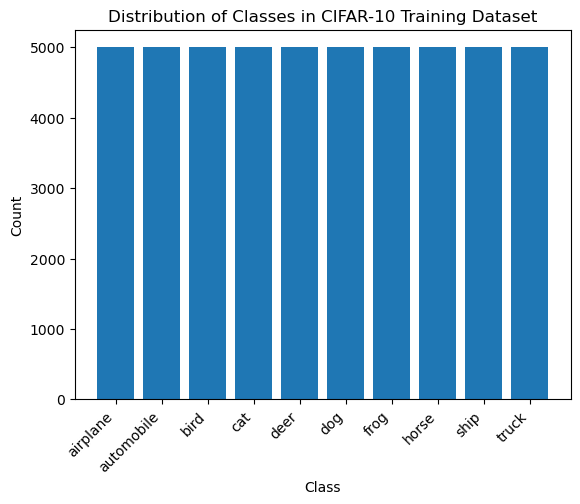

In [10]:
# Get the frequency of each class in the training dataset
counts = np.bincount(y_train[:, 0])

# Define the names of each class
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the bar chart
plt.bar(classes, counts)
plt.title('Distribution of Classes in CIFAR-10 Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6. Check the Distribution in Testing Dataset

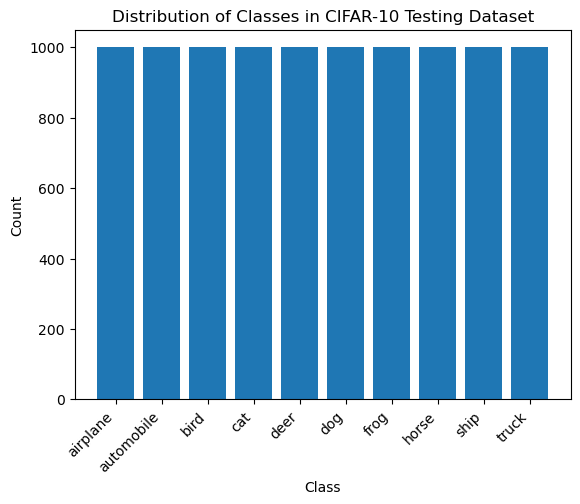

In [11]:
# Get the frequency of each class in the training dataset
counts = np.bincount(y_test[:, 0])

# Define the names of each class
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the bar chart
plt.bar(classes, counts)
plt.title('Distribution of Classes in CIFAR-10 Testing Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 7. Check the Distribution of Pixels of the first image from each class

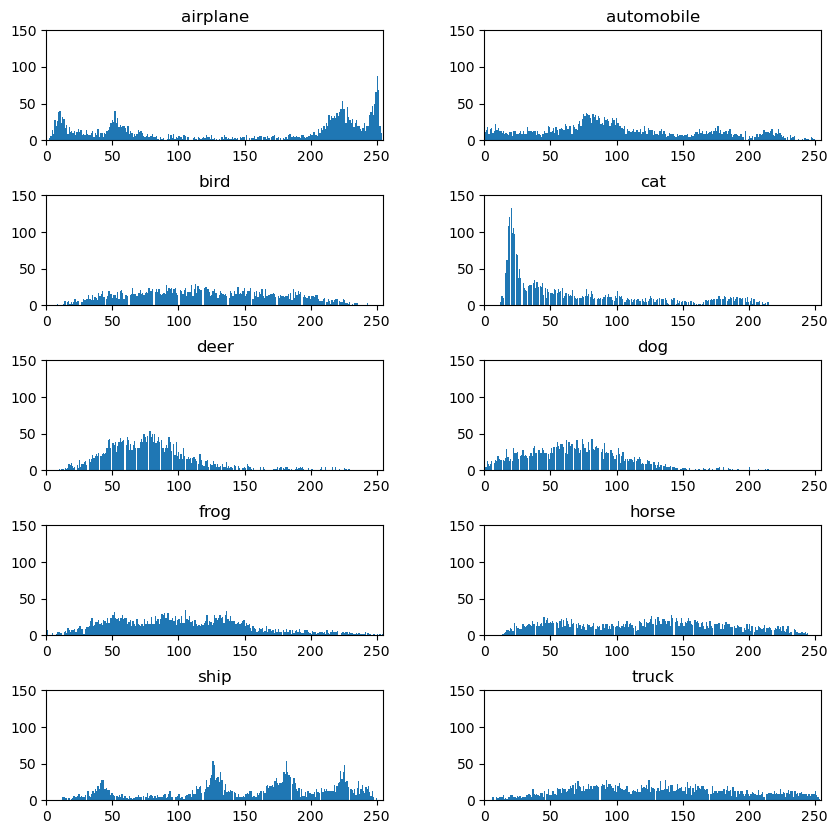

In [12]:
# Plot histograms of pixel values for different classes
plt.figure(figsize=(10, 10))  # Create a new figure with size 10x10
# Add vertical and horizontal spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop over the different classes in the dataset
for i in range(num_classes):  
    idx = np.where(y_train == i)[0][0]  # Find the index of the first image in the training set that belongs to the current class
    plt.subplot(5, 2, i+1)  # Set up a 5x2 grid of subplots and select the i+1-th subplot for the current class
    plt.hist(x_train[idx].ravel(), bins=255)  # Plot a histogram of the pixel values for the selected image, using 255 bins
    plt.xlim([0, 255])  # Set the x-axis limits to [0, 255]
    plt.ylim([0, 150])  # Set the y-axis limits to [0, 150]
    plt.title(class_names[i])  # Add a title to the subplot indicating the name of the current class
    
# Display the figure with all the subplots
plt.show()  

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Pre-Trained Models</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Baseline):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:32 | Epochs:20 

##  <font color= maroon> Data Preparation (Baseline) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [11]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [12]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [13]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [14]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [15]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 32

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Baseline) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [16]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False


16705208/16705208 [==============================] - 0s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [17]:
efficientnetb0_model.summary()

Model: "efficientnetb0"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               

                                )]                                                                

                                                                                                  

 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                

                                                                                                  

 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              

                                                                                                  

 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normali

### 3. Build the Overall Model Architecture

In [18]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [19]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   

                                                                 

 flatten (Flatten)           (None, 62720)             0         

                                                                 

 dense (Dense)               (None, 512)               32113152  

                                                                 

 dense_1 (Dense)             (None, 256)               131328    

                                                                 

 dense_2 (Dense)             (None, 10)                2570      

                                                                 


Total params: 36,296,621

Trainable params: 32,247,050

Non-trainable params: 4,049,571

_________________________________________________________________


##  <font color= maroon> Data Training (Baseline) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [20]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [21]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20

1563/1563 [==============================] - 137s 78ms/step - loss: 0.5400 - accuracy: 0.8464 - val_loss: 0.3314 - val_accuracy: 0.8922

Epoch 2/20

1563/1563 [==============================] - 121s 77ms/step - loss: 0.2341 - accuracy: 0.9246 - val_loss: 0.3255 - val_accuracy: 0.9013

Epoch 3/20

1563/1563 [==============================] - 121s 77ms/step - loss: 0.1674 - accuracy: 0.9446 - val_loss: 0.3727 - val_accuracy: 0.9021

Epoch 4/20

1563/1563 [==============================] - 120s 77ms/step - loss: 0.1414 - accuracy: 0.9537 - val_loss: 0.4002 - val_accuracy: 0.9012

Epoch 5/20

1563/1563 [==============================] - 120s 77ms/step - loss: 0.1063 - accuracy: 0.9667 - val_loss: 0.4676 - val_accuracy: 0.9009

Epoch 6/20

1563/1563 [==============================] - 120s 77ms/step - loss: 0.0997 - accuracy: 0.9697 - val_loss: 0.4594 - val_accuracy: 0.8978

Epoch 7/20

1563/1563 [==============================] - 120s 77ms/step - loss: 0.0884 - accuracy: 0.9741 

##  <font color= maroon> Data Evaluation (Baseline) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

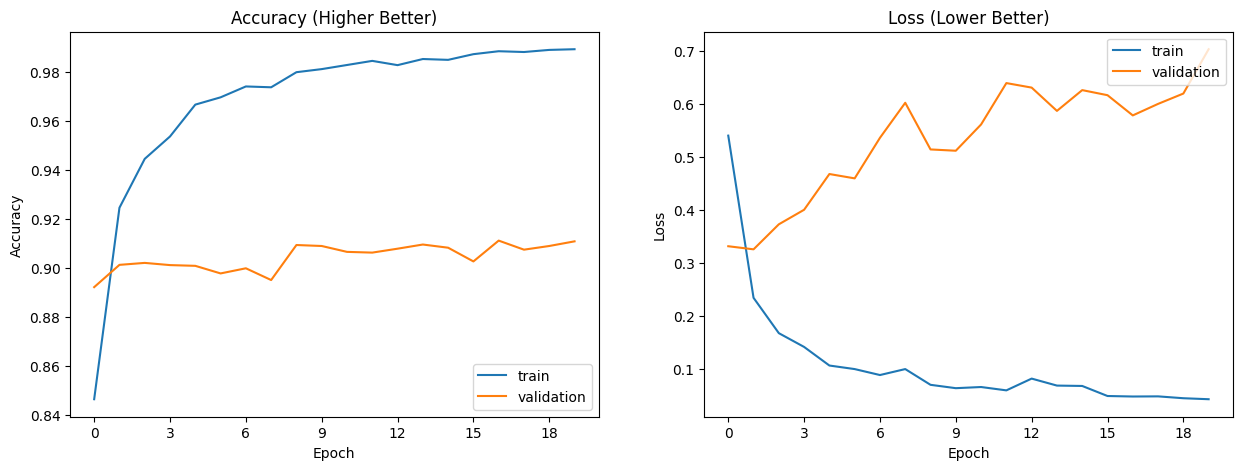

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [23]:
score = model.evaluate(test_set, verbose=0)

In [24]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7029703855514526

Test accuracy: 0.9108999967575073


### 3. Visualise the Wrongly Classified Data

In [25]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

313/313 [==============================] - 18s 54ms/step

[3 8 8 ... 5 1 7]


In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [27]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

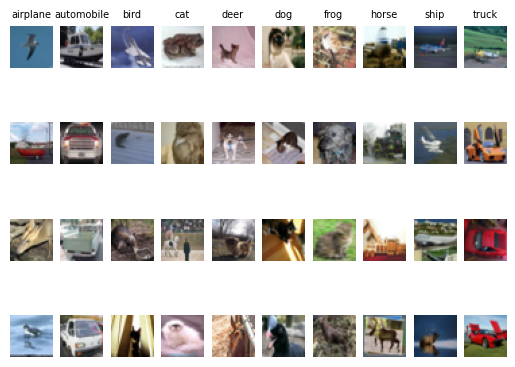

In [28]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 1</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 1):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:32 | Epochs:20 
5. 2x Dropout (30%/20%)

### Difference from Baseline:
1. 2x Dropout (30%/20%)

### Note:
    - Built off from Baseline

##  <font color= maroon> Data Preparation (Tuned 1) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [29]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [30]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [31]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [32]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [33]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 32

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 1) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [34]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [35]:
efficientnetb0_model.summary()

Model: "efficientnetb0"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               

                                )]                                                                

                                                                                                  

 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                

                                                                                                  

 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            

 )                                                                                                

                                                                          

### 3. Build the Overall Model Architecture

In [36]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [37]:
model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   

                                                                 

 flatten_1 (Flatten)         (None, 62720)             0         

                                                                 

 dense_3 (Dense)             (None, 512)               32113152  

                                                                 

 dropout (Dropout)           (None, 512)               0         

                                                                 

 dense_4 (Dense)             (None, 256)               131328    

                                                                 

 dropout_1 (Dropout)         (None, 256)               0         

                                                                 

 dense_5 (Dense)             (None, 10

##  <font color= maroon> Data Training (Tuned 1) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [38]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [39]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20

1563/1563 [==============================] - 122s 74ms/step - loss: 0.7359 - accuracy: 0.8052 - val_loss: 0.3386 - val_accuracy: 0.8912

Epoch 2/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.3743 - accuracy: 0.8837 - val_loss: 0.3223 - val_accuracy: 0.8975

Epoch 3/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.3276 - accuracy: 0.8985 - val_loss: 0.3242 - val_accuracy: 0.9028

Epoch 4/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.2961 - accuracy: 0.9105 - val_loss: 0.3308 - val_accuracy: 0.8991

Epoch 5/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.2712 - accuracy: 0.9187 - val_loss: 0.3541 - val_accuracy: 0.9040

Epoch 6/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.2463 - accuracy: 0.9285 - val_loss: 0.3761 - val_accuracy: 0.9051

Epoch 7/20

1563/1563 [==============================] - 118s 75ms/step - loss: 0.2242 - accuracy: 0.9365 

##  <font color= maroon> Data Evaluation (Tuned 1) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

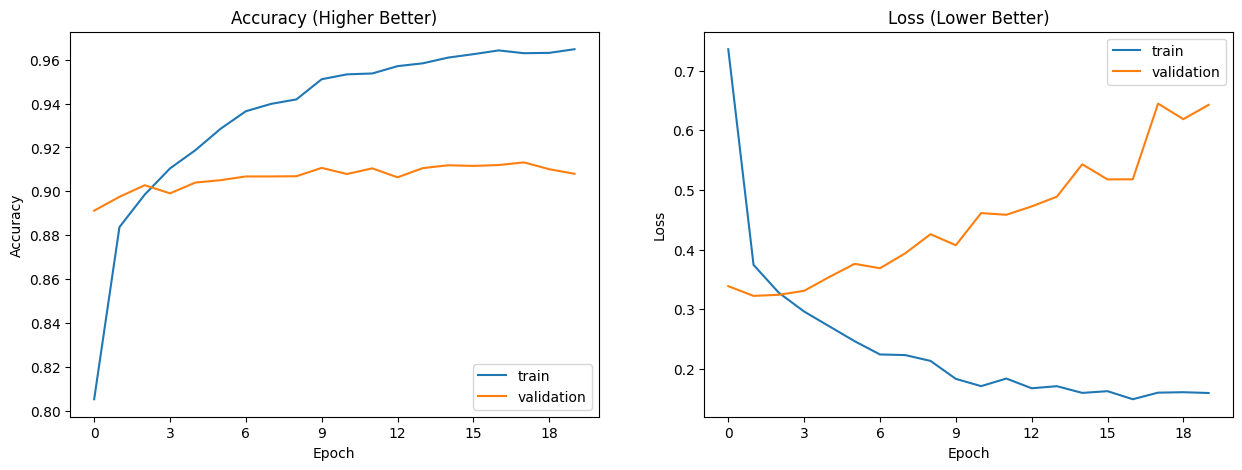

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [41]:
score = model.evaluate(test_set, verbose=0)

In [42]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6426634788513184

Test accuracy: 0.9079999923706055


### 3. Visualise the Wrongly Classified Data

In [43]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

313/313 [==============================] - 19s 55ms/step

[3 8 8 ... 5 1 7]


In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [45]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

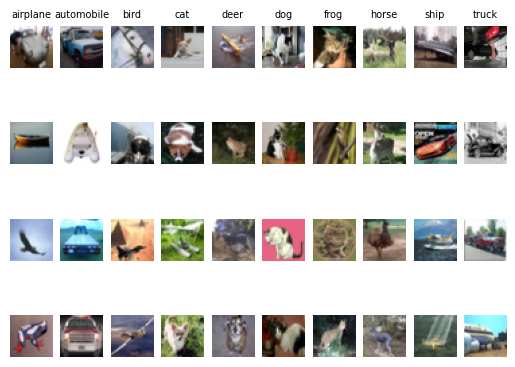

In [46]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 2</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 2):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:20 
5. 2x Dropout (30%/20%)

### Difference from Baseline:
1. 2x Dropout (30%/20%)
2. Batch Size:32 -> 64

### Note:
    - Built off from Tuned 1

##  <font color= maroon> Data Preparation (Tuned 2) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [14]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [15]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [16]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [17]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [18]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 64

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 2) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [19]:
# Load the pre-trained EfficientNet0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [20]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

### 3. Build the Overall Model Architecture

In [21]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

##  <font color= maroon> Data Training (Tuned 2) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [23]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [24]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20


2023-05-29 04:10:09.904504: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 94s 103ms/step - loss: 0.7029 - accuracy: 0.8065 - val_loss: 0.3380 - val_accuracy: 0.8904
Epoch 2/20
782/782 [==============================] - 79s 101ms/step - loss: 0.3536 - accuracy: 0.8864 - val_loss: 0.3128 - val_accuracy: 0.8995
Epoch 3/20
782/782 [==============================] - 79s 101ms/step - loss: 0.2734 - accuracy: 0.9126 - val_loss: 0.3123 - val_accuracy: 0.9056
Epoch 4/20
782/782 [==============================] - 79s 101ms/step - loss: 0.2369 - accuracy: 0.9246 - val_loss: 0.3159 - val_accuracy: 0.9053
Epoch 5/20
782/782 [==============================] - 79s 101ms/step - loss: 0.2101 - accuracy: 0.9331 - val_loss: 0.2974 - val_accuracy: 0.9122
Epoch 6/20
782/782 [==============================] - 79s 101ms/step - loss: 0.1873 - accuracy: 0.9432 - val_loss: 0.3354 - val_accuracy: 0.9075
Epoch 7/20
782/782 [==============================] - 79s 101ms/step - loss: 0.1697 - accuracy: 0.9481 - val_loss: 0.3327 - val_accuracy: 0.9

##  <font color= maroon> Data Evaluation (Tuned 2) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

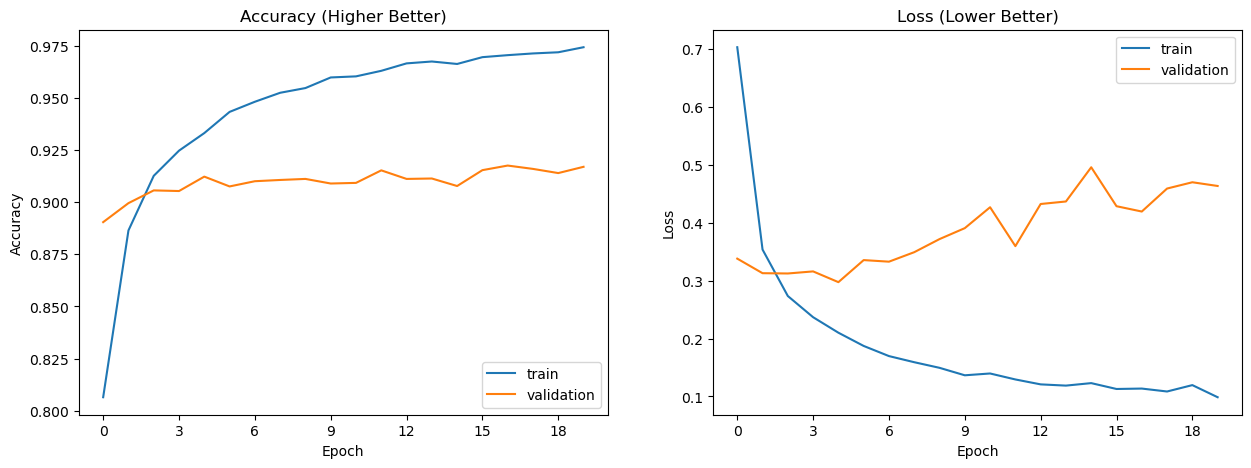

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [26]:
score = model.evaluate(test_set, verbose=0)

In [27]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4633910655975342
Test accuracy: 0.9168999791145325


### 3. Visualise the Wrongly Classified Data

In [28]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

157/157 [==============================] - 12s 66ms/step
[3 8 8 ... 5 1 7]


In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [30]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

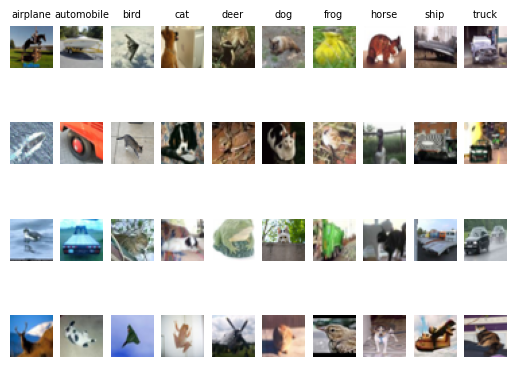

In [31]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 3</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 3):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (30%/20%)

### Difference from Baseline:
1. 2x Dropout (30%/20%)
2. Batch Size:32 -> 128

### Note:
    - Built off from Tuned 2

##  <font color= maroon> Data Preparation (Tuned 3) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [32]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [33]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [34]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [35]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [36]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 3) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [37]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [38]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [39]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 3) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [41]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [42]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20


2023-05-29 04:55:47.240369: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 83s 194ms/step - loss: 0.6830 - accuracy: 0.8132 - val_loss: 0.3320 - val_accuracy: 0.8909
Epoch 2/20
391/391 [==============================] - 64s 163ms/step - loss: 0.3333 - accuracy: 0.8921 - val_loss: 0.2972 - val_accuracy: 0.9032
Epoch 3/20
391/391 [==============================] - 64s 163ms/step - loss: 0.2492 - accuracy: 0.9191 - val_loss: 0.2968 - val_accuracy: 0.9052
Epoch 4/20
391/391 [==============================] - 64s 163ms/step - loss: 0.1965 - accuracy: 0.9355 - val_loss: 0.2913 - val_accuracy: 0.9097
Epoch 5/20
391/391 [==============================] - 64s 163ms/step - loss: 0.1696 - accuracy: 0.9440 - val_loss: 0.3043 - val_accuracy: 0.9108
Epoch 6/20
391/391 [==============================] - 64s 163ms/step - loss: 0.1496 - accuracy: 0.9518 - val_loss: 0.3459 - val_accuracy: 0.9105
Epoch 7/20
391/391 [==============================] - 63s 162ms/step - loss: 0.1346 - accuracy: 0.9572 - val_loss: 0.3427 - val_accuracy: 0.9

##  <font color= maroon> Data Evaluation (Tuned 3) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

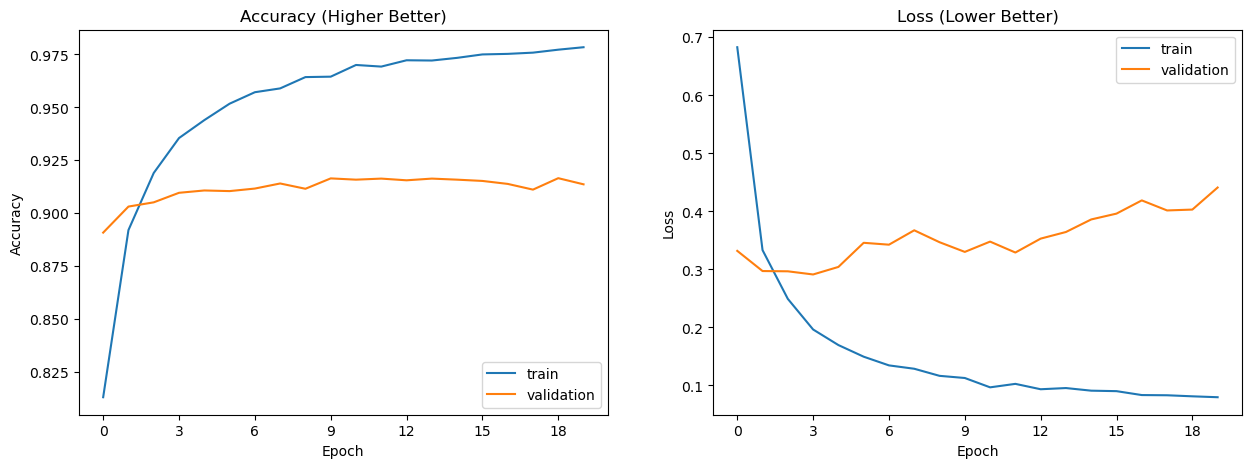

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [44]:
score = model.evaluate(test_set, verbose=0)

In [45]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4411858320236206
Test accuracy: 0.9136999845504761


### 3. Visualise the Wrongly Classified Data

In [46]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 121ms/step
[3 8 8 ... 5 1 7]


In [47]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [48]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

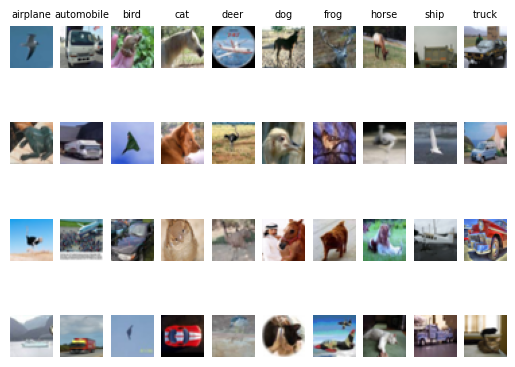

In [49]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 4</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 4):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (50%/30%)

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128

### Note:
    - Built off from Tuned 3

##  <font color= maroon> Data Preparation (Tuned 4) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [50]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [51]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [52]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [53]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [54]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 4) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [55]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [56]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [58]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

##  <font color= maroon> Data Training (Tuned 4) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [60]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [61]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20


2023-05-29 05:36:22.116170: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 72s 166ms/step - loss: 0.9357 - accuracy: 0.7613 - val_loss: 0.3840 - val_accuracy: 0.8812
Epoch 2/20
391/391 [==============================] - 64s 164ms/step - loss: 0.4960 - accuracy: 0.8535 - val_loss: 0.3248 - val_accuracy: 0.9010
Epoch 3/20
391/391 [==============================] - 64s 163ms/step - loss: 0.3734 - accuracy: 0.8850 - val_loss: 0.2981 - val_accuracy: 0.9056
Epoch 4/20
391/391 [==============================] - 63s 162ms/step - loss: 0.3065 - accuracy: 0.9052 - val_loss: 0.2891 - val_accuracy: 0.9095
Epoch 5/20
391/391 [==============================] - 64s 164ms/step - loss: 0.2719 - accuracy: 0.9167 - val_loss: 0.2808 - val_accuracy: 0.9115
Epoch 6/20
391/391 [==============================] - 63s 162ms/step - loss: 0.2421 - accuracy: 0.9254 - val_loss: 0.2728 - val_accuracy: 0.9131
Epoch 7/20
391/391 [==============================] - 63s 162ms/step - loss: 0.2168 - accuracy: 0.9314 - val_loss: 0.2726 - val_accuracy: 0.9

##  <font color= maroon> Data Evaluation (Tuned 4) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

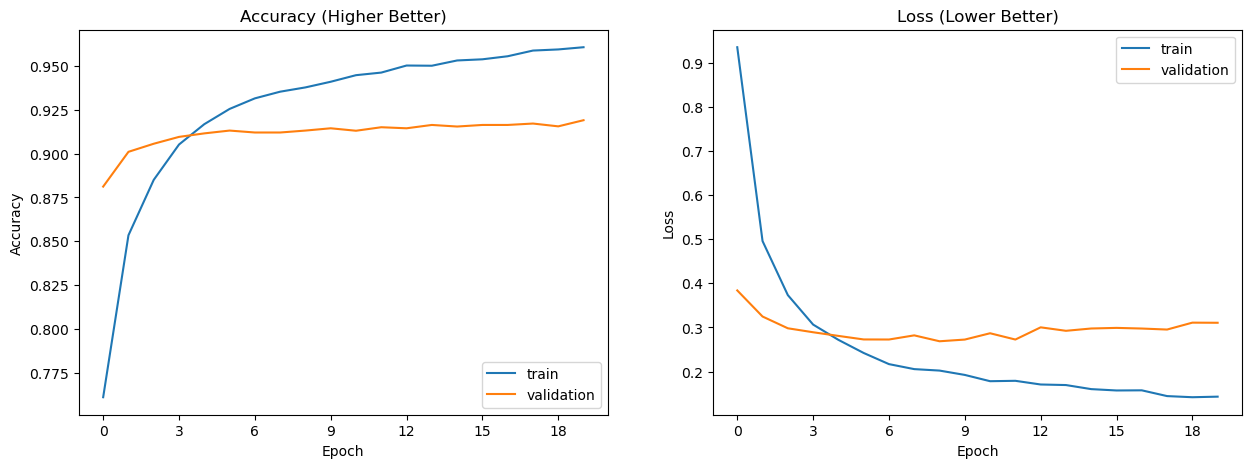

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [63]:
score = model.evaluate(test_set, verbose=0)

In [64]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3106236159801483
Test accuracy: 0.9190000295639038


### 3. Visualise the Wrongly Classified Data

In [65]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 122ms/step
[3 8 8 ... 5 1 7]


In [66]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [67]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

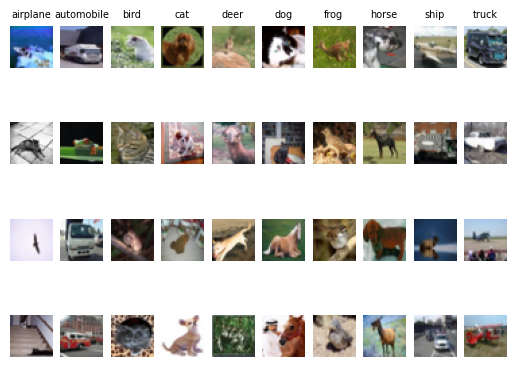

In [68]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 5</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 5):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:50 
5. 2x Dropout (50%/30%)
6. L2Regularizer(0.001)

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128
3. L2Regularizer(0.001)

### Note:
    - Built off from Tuned 4

##  <font color= maroon> Data Preparation (Tuned 5) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [69]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [70]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [71]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [72]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [73]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 5) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [74]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [75]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_6[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [76]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               32113152  
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

##  <font color= maroon> Data Training (Tuned 5) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [78]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [79]:
model_log = model.fit(training_set, epochs=20, validation_data=test_set)

Epoch 1/20


2023-05-29 06:28:54.168820: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 73s 168ms/step - loss: 2.7689 - accuracy: 0.7697 - val_loss: 1.9245 - val_accuracy: 0.8712
Epoch 2/20
391/391 [==============================] - 64s 165ms/step - loss: 1.7586 - accuracy: 0.8449 - val_loss: 1.4069 - val_accuracy: 0.8905
Epoch 3/20
391/391 [==============================] - 64s 164ms/step - loss: 1.3729 - accuracy: 0.8631 - val_loss: 1.2152 - val_accuracy: 0.8996
Epoch 4/20
391/391 [==============================] - 64s 163ms/step - loss: 1.2263 - accuracy: 0.8673 - val_loss: 1.0758 - val_accuracy: 0.8976
Epoch 5/20
391/391 [==============================] - 64s 163ms/step - loss: 1.1430 - accuracy: 0.8708 - val_loss: 1.0515 - val_accuracy: 0.8960
Epoch 6/20
391/391 [==============================] - 64s 164ms/step - loss: 1.1292 - accuracy: 0.8667 - val_loss: 1.0386 - val_accuracy: 0.8941
Epoch 7/20
391/391 [==============================] - 64s 164ms/step - loss: 1.0905 - accuracy: 0.8665 - val_loss: 1.0305 - val_accuracy: 0.8

##  <font color= maroon> Data Evaluation (Tuned 5) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

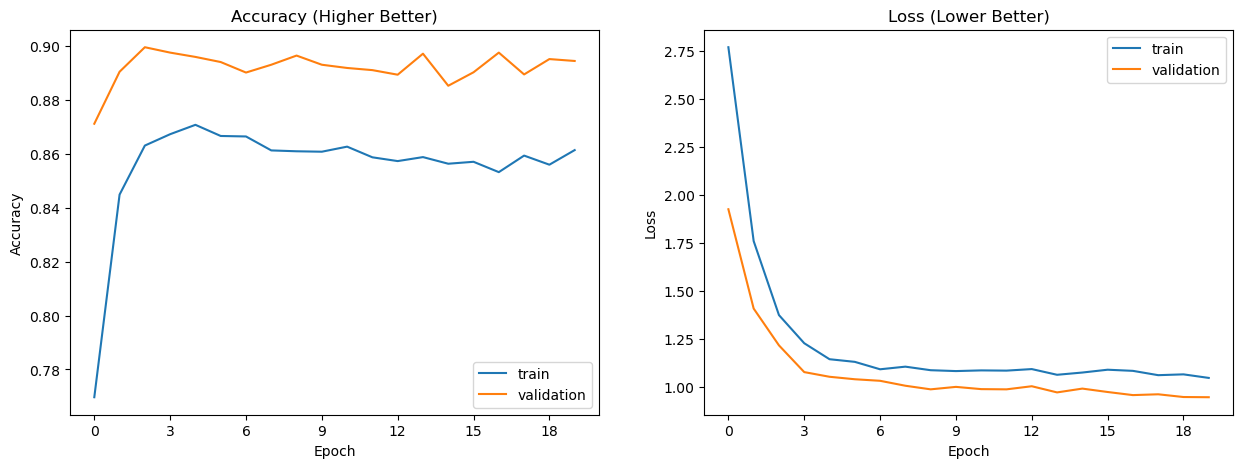

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [81]:
score = model.evaluate(test_set, verbose=0)

In [82]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9448953866958618
Test accuracy: 0.8945000171661377


### 3. Visualise the Wrongly Classified Data

In [83]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 12s 123ms/step
[3 8 8 ... 5 0 7]


In [84]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [85]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

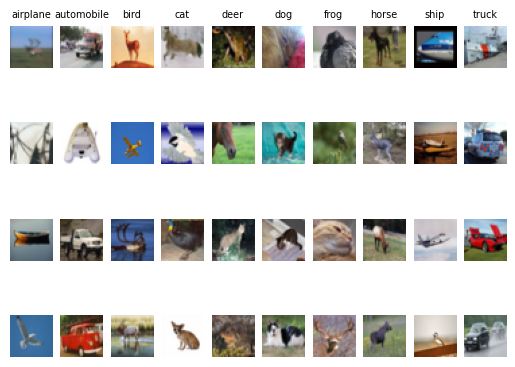

In [86]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 6</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 6):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128
3. Early_Stopper(Patience=10)
4. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)

### Note:
    - Built off from Tuned 4

##  <font color= maroon> Data Preparation (Tuned 6) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [87]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [88]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [89]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [90]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [91]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 6) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [92]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [93]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_8 (Rescaling)        (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization_4 (Normalization  (None, 224, 224, 3)  7          ['rescaling_8[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [94]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               32113152  
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 10)               

##  <font color= maroon> Data Training (Tuned 6) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [96]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [98]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#Define a learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001)

model_log = model.fit(training_set, epochs=20, validation_data=test_set, callbacks=[early_stop, lr_scheduler])

Epoch 1/20


2023-05-29 07:33:05.053371: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 73s 168ms/step - loss: 0.9071 - accuracy: 0.7675 - val_loss: 0.3678 - val_accuracy: 0.8828 - lr: 0.0010
Epoch 2/20
391/391 [==============================] - 64s 163ms/step - loss: 0.4911 - accuracy: 0.8534 - val_loss: 0.3176 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 3/20
391/391 [==============================] - 63s 162ms/step - loss: 0.3652 - accuracy: 0.8870 - val_loss: 0.3028 - val_accuracy: 0.9059 - lr: 0.0010
Epoch 4/20
391/391 [==============================] - 64s 163ms/step - loss: 0.3040 - accuracy: 0.9056 - val_loss: 0.2877 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 5/20
391/391 [==============================] - 63s 162ms/step - loss: 0.2618 - accuracy: 0.9182 - val_loss: 0.2754 - val_accuracy: 0.9114 - lr: 0.0010
Epoch 6/20
391/391 [==============================] - 64s 163ms/step - loss: 0.2415 - accuracy: 0.9260 - val_loss: 0.2734 - val_accuracy: 0.9149 - lr: 0.0010
Epoch 7/20
391/391 [==============================] - 63s 162ms

##  <font color= maroon> Data Evaluation (Tuned 6) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

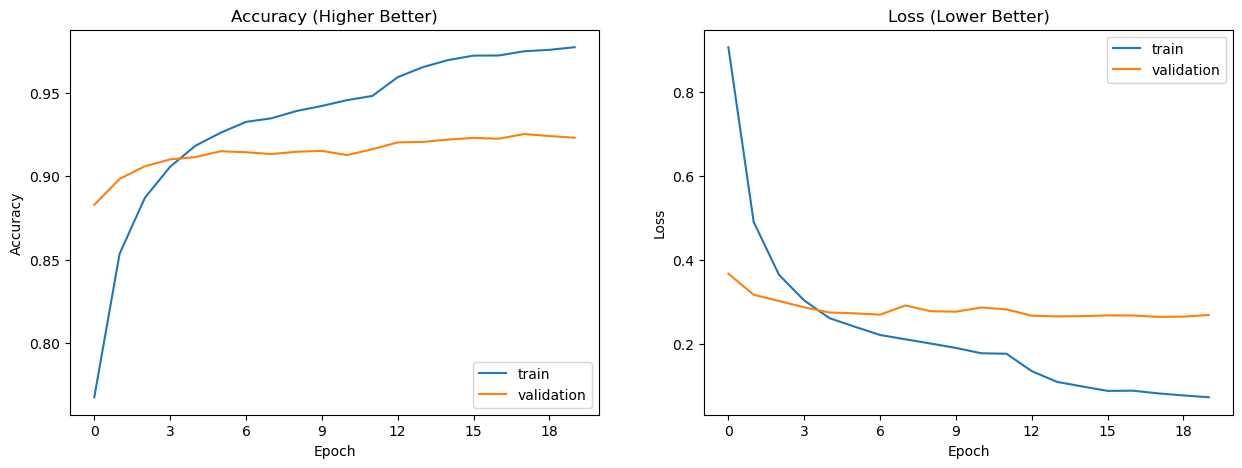

In [100]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [101]:
score = model.evaluate(test_set, verbose=0)

In [102]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.269420325756073
Test accuracy: 0.9229999780654907


### 3. Visualise the Wrongly Classified Data

In [103]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 122ms/step
[3 8 8 ... 5 1 7]


In [104]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [105]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

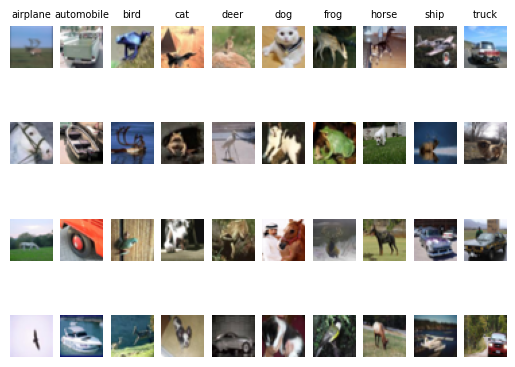

In [106]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 7</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 7):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
8. BatchNormalisation()

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128
3. Early_Stopper(Patience=10)
4. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
5. BatchNormalisation()
    
### Note:
    - Built off from Tuned 6

##  <font color= maroon> Data Preparation (Tuned 7) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [107]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [108]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [109]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [110]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [111]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 7) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [112]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [113]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_10 (Rescaling)       (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_5 (Normalization  (None, 224, 224, 3)  7          ['rescaling_10[0][0]']           
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [114]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [115]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               32113152  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                      

##  <font color= maroon> Data Training (Tuned 7) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [116]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [117]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#Define a learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001)

model_log = model.fit(training_set, epochs=20, validation_data=test_set, callbacks=[early_stop, lr_scheduler])

Epoch 1/20


2023-05-29 08:34:39.862597: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 75s 170ms/step - loss: 0.4514 - accuracy: 0.8493 - val_loss: 0.2848 - val_accuracy: 0.9053 - lr: 0.0010
Epoch 2/20
391/391 [==============================] - 64s 163ms/step - loss: 0.2430 - accuracy: 0.9156 - val_loss: 0.2648 - val_accuracy: 0.9135 - lr: 0.0010
Epoch 3/20
391/391 [==============================] - 64s 164ms/step - loss: 0.1763 - accuracy: 0.9386 - val_loss: 0.2742 - val_accuracy: 0.9161 - lr: 0.0010
Epoch 4/20
391/391 [==============================] - 64s 163ms/step - loss: 0.1325 - accuracy: 0.9536 - val_loss: 0.2853 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 5/20
391/391 [==============================] - 64s 163ms/step - loss: 0.1145 - accuracy: 0.9600 - val_loss: 0.2995 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 6/20
391/391 [==============================] - 64s 163ms/step - loss: 0.0949 - accuracy: 0.9668 - val_loss: 0.3028 - val_accuracy: 0.9157 - lr: 0.0010
Epoch 7/20
391/391 [==============================] - 64s 163ms

##  <font color= maroon> Data Evaluation (Tuned 7) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

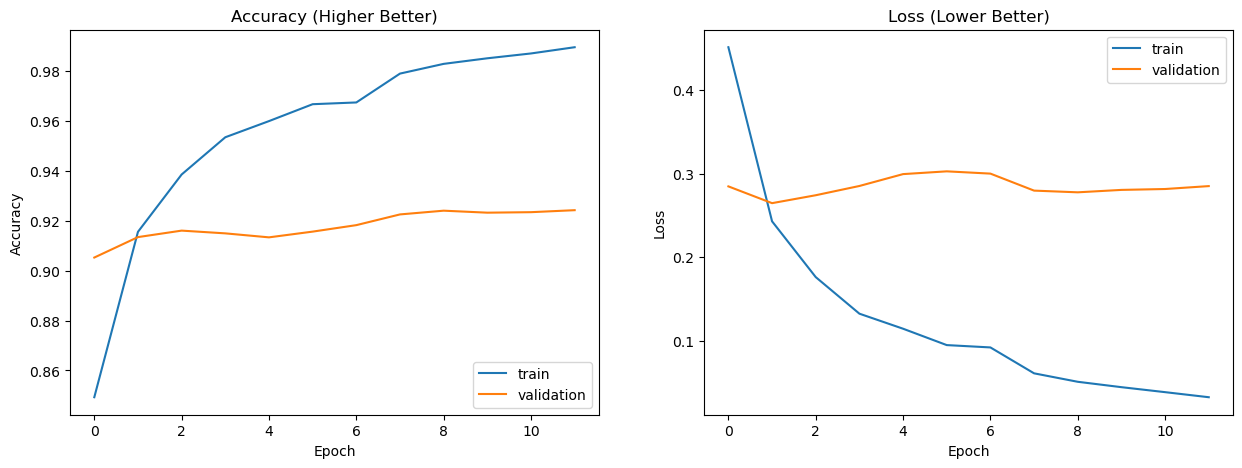

In [118]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [119]:
score = model.evaluate(test_set, verbose=0)

In [120]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.285169780254364
Test accuracy: 0.9243000149726868


### 3. Visualise the Wrongly Classified Data

In [121]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 121ms/step
[3 8 8 ... 5 1 7]


In [122]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [123]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

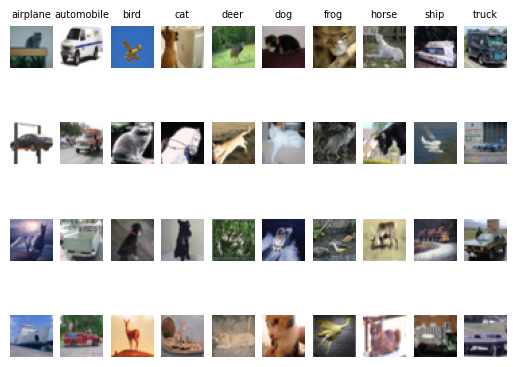

In [124]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 8</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 8):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. RMSProp Optimizer
4. Batch Size:128 | Epochs:20 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
    

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128
3. Early_Stopper(Patience=10)
4. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
5. Adam -> RMSProp Optimizer

### Note:
    - Built off from Tuned 6

##  <font color= maroon> Data Preparation (Tuned 8) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [14]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [15]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [16]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [17]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [18]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 8) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [19]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [20]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

### 3. Build the Overall Model Architecture

In [21]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

##  <font color= maroon> Data Training (Tuned 8) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [23]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [24]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#Define a learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001)

model_log = model.fit(training_set, epochs=20, validation_data=test_set, callbacks=[early_stop, lr_scheduler])

Epoch 1/20


2023-05-29 09:37:49.925977: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 80s 170ms/step - loss: 0.9189 - accuracy: 0.7644 - val_loss: 0.3724 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 2/20
391/391 [==============================] - 63s 162ms/step - loss: 0.5054 - accuracy: 0.8517 - val_loss: 0.3303 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 3/20
391/391 [==============================] - 64s 163ms/step - loss: 0.3679 - accuracy: 0.8879 - val_loss: 0.2975 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 4/20
391/391 [==============================] - 64s 163ms/step - loss: 0.3008 - accuracy: 0.9058 - val_loss: 0.2874 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 5/20
391/391 [==============================] - 63s 162ms/step - loss: 0.2610 - accuracy: 0.9187 - val_loss: 0.2765 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 6/20
391/391 [==============================] - 63s 162ms/step - loss: 0.2383 - accuracy: 0.9261 - val_loss: 0.2735 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 7/20
391/391 [==============================] - 63s 162ms

##  <font color= maroon> Data Evaluation (Tuned 8) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

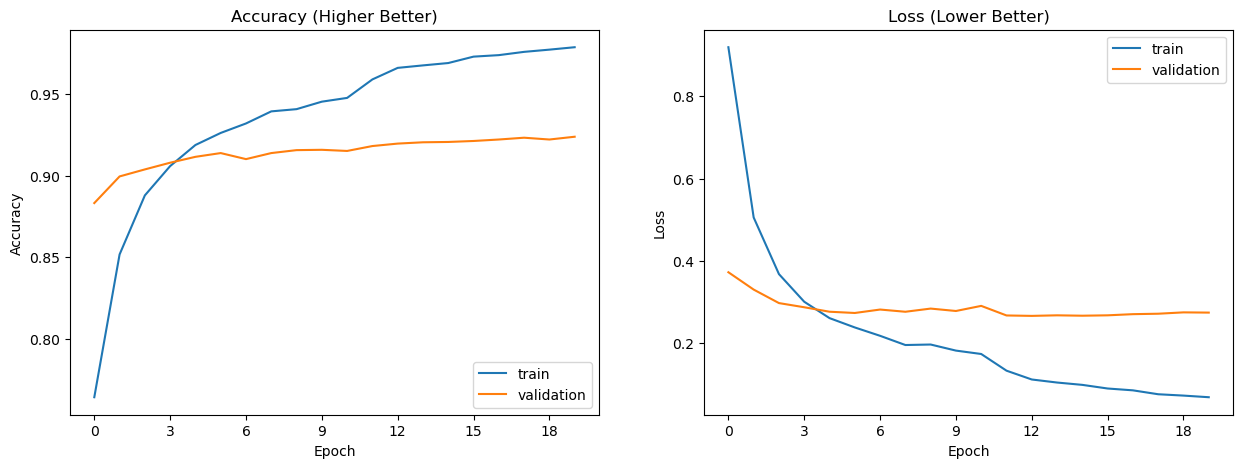

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [26]:
score = model.evaluate(test_set, verbose=0)

In [27]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2743784189224243
Test accuracy: 0.923799991607666


### 3. Visualise the Wrongly Classified Data

In [28]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 121ms/step
[3 8 8 ... 5 1 7]


In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [30]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

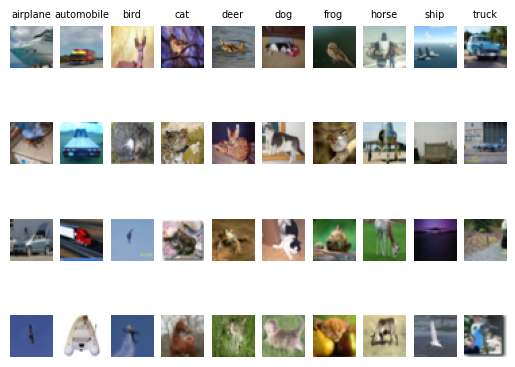

In [31]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 9</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 9):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:128 | Epochs:50 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
8. Data Augmentation

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 128
3. Early_Stopper(Patience=10)
4. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
5. Epoch: 20 -> 50
6. Data Augmentation

### Note:
    - Built off from Tuned 6

##  <font color= maroon> Data Preparation (Tuned 9) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [32]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [33]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [34]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [35]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [36]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 128

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 9) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [37]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

### 2. Print the Summary of the EfficientNetB0 Model

In [38]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [39]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 9) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [41]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [43]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#Define a learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001)

model_log = model.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stop, lr_scheduler])

Epoch 1/50


2023-05-29 10:04:44.271725: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


391/391 [==============================] - 98s 240ms/step - loss: 1.4268 - accuracy: 0.5634 - val_loss: 0.5505 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 2/50
391/391 [==============================] - 92s 234ms/step - loss: 0.9801 - accuracy: 0.6773 - val_loss: 0.5171 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 3/50
391/391 [==============================] - 92s 234ms/step - loss: 0.8450 - accuracy: 0.7195 - val_loss: 0.4548 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 4/50
391/391 [==============================] - 92s 236ms/step - loss: 0.7836 - accuracy: 0.7412 - val_loss: 0.4525 - val_accuracy: 0.8598 - lr: 0.0010
Epoch 5/50
391/391 [==============================] - 92s 234ms/step - loss: 0.7480 - accuracy: 0.7520 - val_loss: 0.4275 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 6/50
391/391 [==============================] - 92s 234ms/step - loss: 0.7279 - accuracy: 0.7594 - val_loss: 0.4227 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 7/50
391/391 [==============================] - 92s 234ms

##  <font color= maroon> Data Evaluation (Tuned 9) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

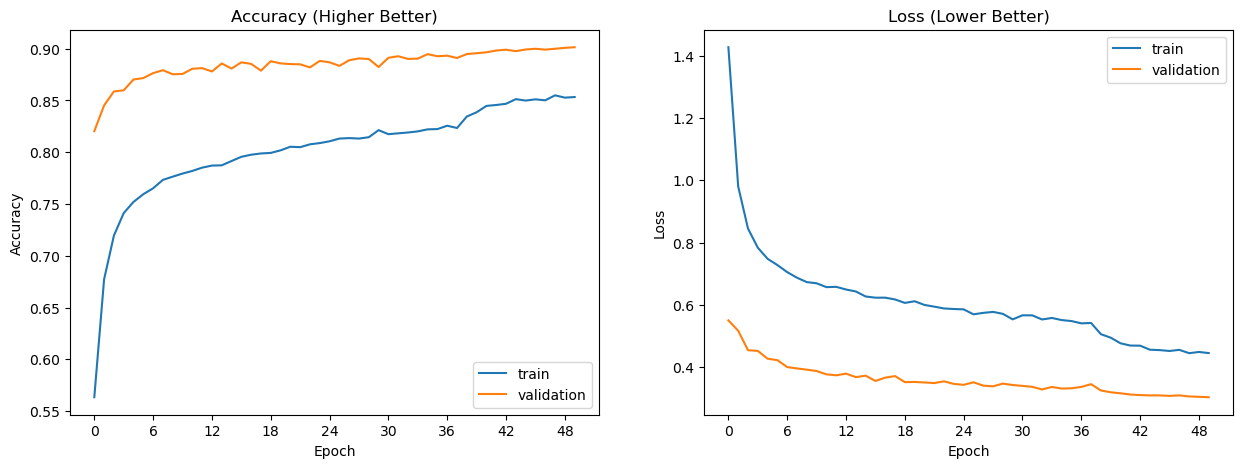

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [45]:
score = model.evaluate(test_set, verbose=0)

In [46]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3038407862186432
Test accuracy: 0.9014000296592712


### 3. Visualise the Wrongly Classified Data

In [47]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

79/79 [==============================] - 11s 123ms/step
[3 8 8 ... 5 1 7]


In [48]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [49]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

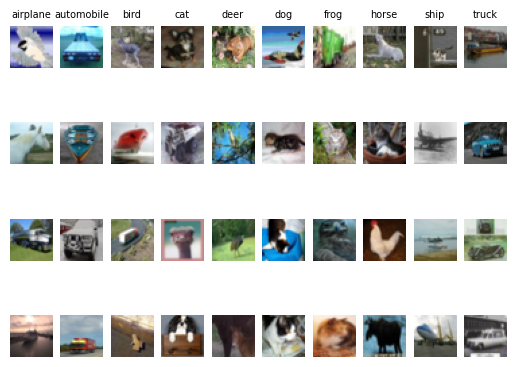

In [50]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 10</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 10):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = False
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:32 | Epochs:50 
5. Early_Stopper(Patience=10)
6. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
7. Data Augmentation

### Difference from Baseline:
1. Early_Stopper(Patience=10)
2. ReduceLROnPlateau (Patience = 5 | Factor = 0.5 | Min_LR = 0.0001)
3. Epoch: 20 -> 50
4. Data Augmentation

### Note:
    - Built off from Tuned 9

##  <font color= maroon> Data Preparation (Tuned 10) - EfficientNetB0 Pre-Trained

### 1. Load the CIFAR-10 Dataset

In [12]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [13]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [14]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [15]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [16]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 32

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 10) - EfficientNetB0 Pre-Trained

### 1. Define the Pre-Trained EfficientNetB0 Model

In [17]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 2s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [18]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

### 3. Build the Overall Model Architecture

In [19]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 36,296,621
Trainable params: 32,247,050
Non-trainable params: 4,049,571
_________________________________________________________________


##  <font color= maroon> Data Training (Tuned 10) - EfficientNetB0 Pre-Trained

### 1. Compile the Model

In [21]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [22]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#Define a learning Rate Scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001)

model_log = model.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stop, lr_scheduler])

Epoch 1/50


2023-05-29 13:15:58.761514: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 130s 74ms/step - loss: 0.8720 - accuracy: 0.7125 - val_loss: 0.4544 - val_accuracy: 0.8437 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 113s 72ms/step - loss: 0.6268 - accuracy: 0.7846 - val_loss: 0.4249 - val_accuracy: 0.8627 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5809 - accuracy: 0.8010 - val_loss: 0.3865 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 112s 71ms/step - loss: 0.5480 - accuracy: 0.8101 - val_loss: 0.4004 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.5246 - accuracy: 0.8192 - val_loss: 0.3897 - val_accuracy: 0.8726 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 113s 72ms/step - loss: 0.5006 - accuracy: 0.8274 - val_loss: 0.3678 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 7/50
1563/1563 [=============================

##  <font color= maroon> Data Evaluation (Tuned 10) - EfficientNetB0 Pre-Trained

### 1. Visualise the Performance

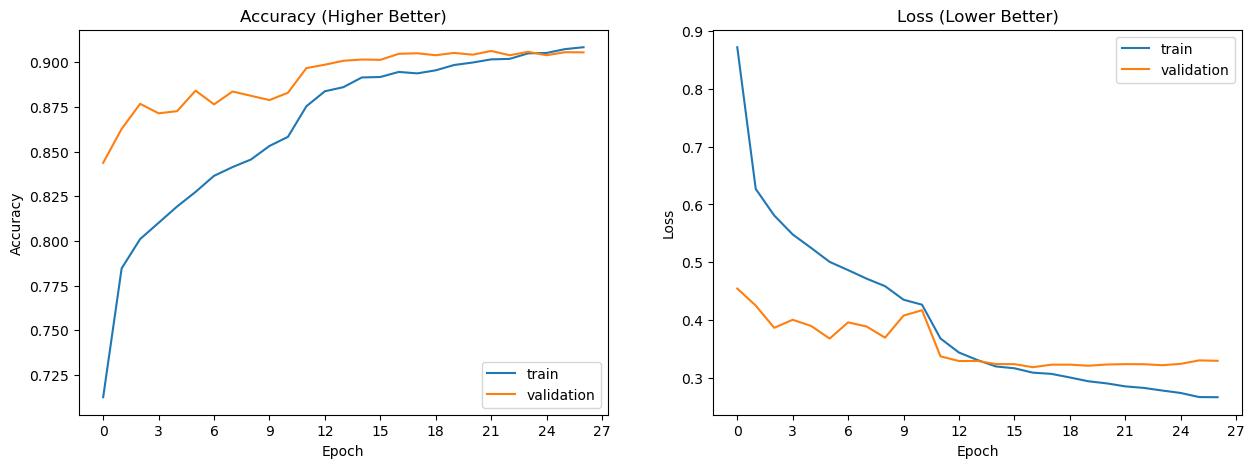

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [24]:
score = model.evaluate(test_set, verbose=0)

In [25]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3293505012989044
Test accuracy: 0.9054999947547913


### 3. Visualise the Wrongly Classified Data

In [26]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

313/313 [==============================] - 12s 35ms/step
[3 8 8 ... 5 1 7]


In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [28]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

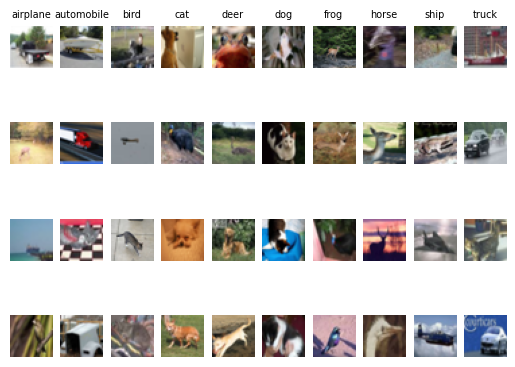

In [29]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 11</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 11):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = True
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:20 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. Learning_Rate(Very Low)

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 64
3. Early_Stopper(Patience=10)
4. Learning_Rate(Very Low)
5. Trainable: False -> True
    
### Note:
    - Built off from Tuned 6

##  <font color= maroon> Data Preparation (Tuned 11) - EfficientNetB0 Re-Train

### 1. Load the CIFAR-10 Dataset

In [36]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [37]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [38]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [39]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [40]:
IMG_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

batch_size = 64

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 11) - EfficientNetB0 Re-Train

### 1. Define the Pre-Trained EfficientNetB0 Model

In [41]:
# Load the pre-trained EfficientNetB7 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the layers of the EfficientNetB7 model
for layer in efficientnetb0_model.layers:
    layer.trainable = True

### 2. Print the Summary of the EfficientNetB0 Model

In [42]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_4[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [43]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

##  <font color= maroon> Data Training (Tuned 11) - EfficientNetB0 Re-Train

### 1. Compile the Model

In [45]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [46]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback = []
def decay(epoch):
    return 0.001 / (1 + 1 * 30)

callback += [keras.callbacks.LearningRateScheduler(decay)]

model_log = model.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stop, callback])

Epoch 1/50


2023-05-29 15:59:37.108595: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 411s 425ms/step - loss: 0.7958 - accuracy: 0.7430 - val_loss: 0.2596 - val_accuracy: 0.9139 - lr: 3.2258e-05
Epoch 2/50
782/782 [==============================] - 331s 423ms/step - loss: 0.2983 - accuracy: 0.9035 - val_loss: 0.2004 - val_accuracy: 0.9338 - lr: 3.2258e-05
Epoch 3/50
782/782 [==============================] - 330s 422ms/step - loss: 0.1851 - accuracy: 0.9399 - val_loss: 0.1796 - val_accuracy: 0.9428 - lr: 3.2258e-05
Epoch 4/50
782/782 [==============================] - 320s 409ms/step - loss: 0.1200 - accuracy: 0.9594 - val_loss: 0.1742 - val_accuracy: 0.9457 - lr: 3.2258e-05
Epoch 5/50
782/782 [==============================] - 321s 410ms/step - loss: 0.0874 - accuracy: 0.9703 - val_loss: 0.1725 - val_accuracy: 0.9495 - lr: 3.2258e-05
Epoch 6/50
782/782 [==============================] - 331s 423ms/step - loss: 0.0634 - accuracy: 0.9792 - val_loss: 0.1662 - val_accuracy: 0.9538 - lr: 3.2258e-05
Epoch 7/50
782/782 [=============

##  <font color= maroon> Data Evaluation (Tuned 11) - EfficientNetB0 Re-Train

### 1. Visualise the Performance

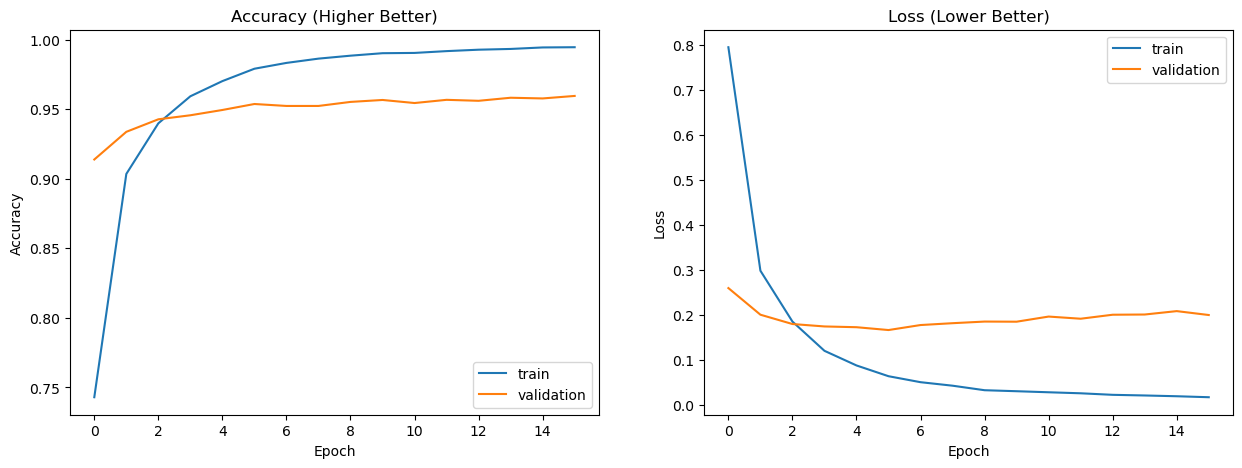

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [48]:
score = model.evaluate(test_set, verbose=0)

In [49]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.199660524725914
Test accuracy: 0.9595999717712402


### 3. Visualise the Wrongly Classified Data

In [50]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

157/157 [==============================] - 11s 64ms/step
[3 8 8 ... 5 1 7]


In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [52]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

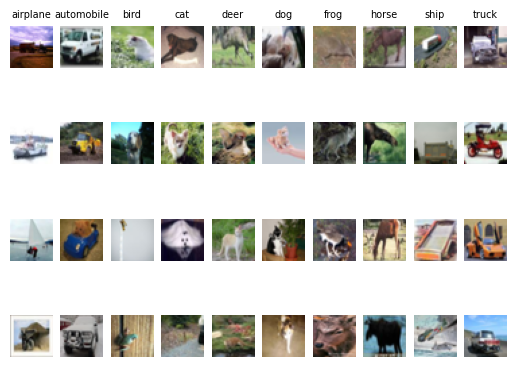

In [53]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 12</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 12):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = True
2. 2x Dense Layers w 512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:50 
5. 2x Dropout (50%/30%)
6. Early_Stopper(Patience=10)
7. Learning_Rate(Very Low)
8. Data Augmentation

### Difference from Baseline:
1. 2x Dropout (50%/30%)
2. Batch Size:32 -> 64
3. Early_Stopper(Patience=10)
4. Learning_Rate(Very Low)
5. Trainable: False -> True
6. Epochs: 20 -> 50
6. Data Augmentation    
    
### Note:
    - Built off from Tuned 11

##  <font color= maroon> Data Preparation (Tuned 12) - EfficientNetB0 Re-Train

### 1. Load the CIFAR-10 Dataset

In [15]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [16]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [17]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [18]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [19]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 64

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 12) - EfficientNetB0 Re-Train

### 1. Define the Pre-Trained EfficientNetB0 Model

In [20]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = True

16705208/16705208 [==============================] - 1s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [21]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

### 3. Build the Overall Model Architecture

In [22]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

##  <font color= maroon> Data Training (Tuned 12) - EfficientNetB0 Re-Train

### 1. Compile the Model

In [24]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [25]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback = []
def decay(epoch):
    return 0.001 / (1 + 1 * 30)

callback += [keras.callbacks.LearningRateScheduler(decay)]

model_log = model.fit(training_set, epochs=50, validation_data=test_set, callbacks=[early_stop, callback])

Epoch 1/50


2023-05-30 05:28:38.271731: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 380s 420ms/step - loss: 1.3643 - accuracy: 0.5338 - val_loss: 0.5377 - val_accuracy: 0.8221 - lr: 3.2258e-05
Epoch 2/50
782/782 [==============================] - 328s 420ms/step - loss: 0.8073 - accuracy: 0.7273 - val_loss: 0.3790 - val_accuracy: 0.8785 - lr: 3.2258e-05
Epoch 3/50
782/782 [==============================] - 327s 418ms/step - loss: 0.6451 - accuracy: 0.7847 - val_loss: 0.3080 - val_accuracy: 0.8975 - lr: 3.2258e-05
Epoch 4/50
782/782 [==============================] - 317s 405ms/step - loss: 0.5462 - accuracy: 0.8163 - val_loss: 0.2780 - val_accuracy: 0.9089 - lr: 3.2258e-05
Epoch 5/50
782/782 [==============================] - 317s 405ms/step - loss: 0.4815 - accuracy: 0.8388 - val_loss: 0.2508 - val_accuracy: 0.9177 - lr: 3.2258e-05
Epoch 6/50
782/782 [==============================] - 327s 418ms/step - loss: 0.4306 - accuracy: 0.8559 - val_loss: 0.2238 - val_accuracy: 0.9254 - lr: 3.2258e-05
Epoch 7/50
782/782 [=============

##  <font color= maroon> Data Evaluation (Tuned 12) - EfficientNetB0 Re-Train

### 1. Visualise the Performance

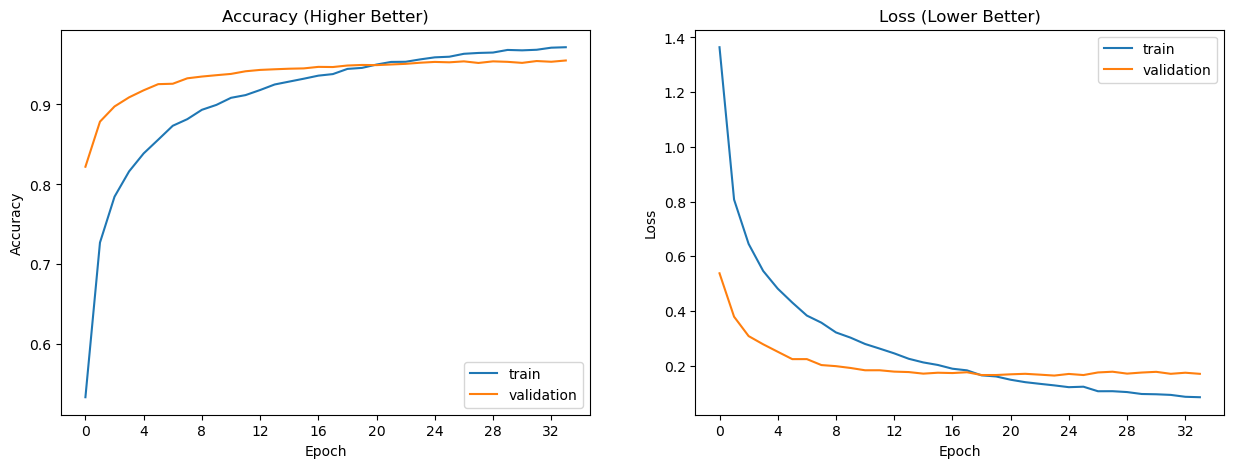

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [27]:
score = model.evaluate(test_set, verbose=0)

In [28]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17002321779727936
Test accuracy: 0.9549999833106995


### 3. Visualise the Wrongly Classified Data

In [29]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

157/157 [==============================] - 12s 66ms/step
[3 8 8 ... 5 1 7]


In [30]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [31]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

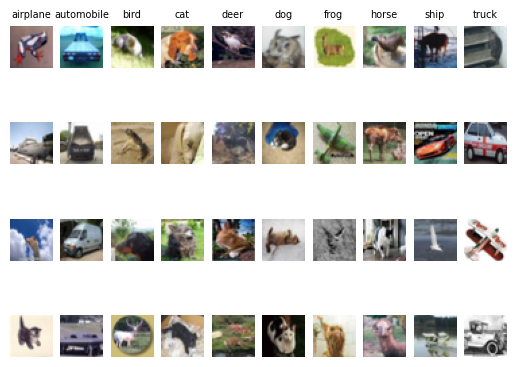

In [32]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 13</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 13):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = True
2. 3x Dense Layers w 1024/512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:100 
5. 3x Dropout (50%/30%/20%)
6. Early_Stopper(Patience=10)
7. Learning_Rate(Very Low)
8. Data Augmentation

### Difference from Baseline:
1. 3x Dropout (50%/30%/20%)
2. Batch Size:32 -> 64
3. Early_Stopper(Patience=10)
4. Learning_Rate(Very Low)
5. Trainable: False -> True
6. Data Augmentation
7. Epochs: 20 -> 100
8. 3x Dense Layers (1024/512/256)
    
### Note:
    - Built off from Tuned 12

##  <font color= maroon> Data Preparation (Tuned 13) - EfficientNetB0 Re-Train

### 1. Load the CIFAR-10 Dataset

In [23]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [24]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [25]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [26]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [27]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 64

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 13) - EfficientNetB0 Re-Train

### 1. Define the Pre-Trained EfficientNetB0 Model

In [28]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = True

### 2. Print the Summary of the EfficientNetB0 Model

In [29]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [30]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 1024)              64226304  
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)              

##  <font color= maroon> Data Training (Tuned 13) - EfficientNetB0 Re-Train

### 1. Compile the Model

In [32]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [33]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback = []
def decay(epoch):
    return 0.001 / (1 + 1 * 30)

callback += [keras.callbacks.LearningRateScheduler(decay)]

model_log = model.fit(training_set, epochs=100, validation_data=test_set, callbacks=[early_stop, callback])

Epoch 1/100


2023-05-30 10:56:36.748265: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 373s 426ms/step - loss: 1.4025 - accuracy: 0.5172 - val_loss: 0.5784 - val_accuracy: 0.8097 - lr: 3.2258e-05
Epoch 2/100
782/782 [==============================] - 333s 425ms/step - loss: 0.8100 - accuracy: 0.7250 - val_loss: 0.3979 - val_accuracy: 0.8691 - lr: 3.2258e-05
Epoch 3/100
782/782 [==============================] - 332s 424ms/step - loss: 0.6434 - accuracy: 0.7849 - val_loss: 0.3020 - val_accuracy: 0.9010 - lr: 3.2258e-05
Epoch 4/100
782/782 [==============================] - 332s 424ms/step - loss: 0.5331 - accuracy: 0.8246 - val_loss: 0.2704 - val_accuracy: 0.9120 - lr: 3.2258e-05
Epoch 5/100
782/782 [==============================] - 332s 425ms/step - loss: 0.4758 - accuracy: 0.8408 - val_loss: 0.2448 - val_accuracy: 0.9203 - lr: 3.2258e-05
Epoch 6/100
782/782 [==============================] - 332s 425ms/step - loss: 0.4187 - accuracy: 0.8621 - val_loss: 0.2212 - val_accuracy: 0.9279 - lr: 3.2258e-05
Epoch 7/100
782/782 [=======

##  <font color= maroon> Data Evaluation (Tuned 13) - EfficientNetB0 Re-Train

### 1. Visualise the Performance

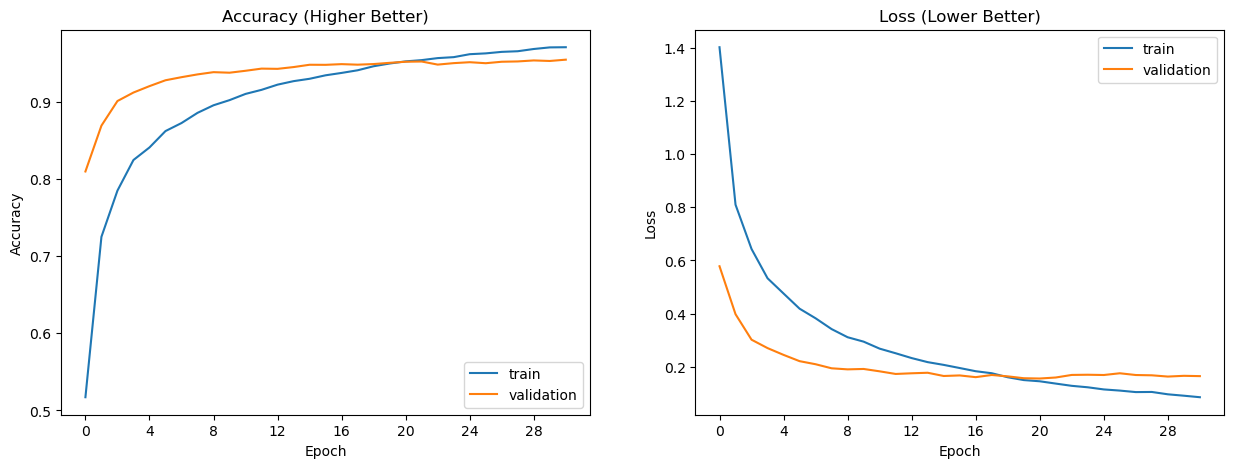

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [35]:
score = model.evaluate(test_set, verbose=0)

In [36]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16490784287452698
Test accuracy: 0.9545999765396118


### 3. Visualise the Wrongly Classified Data

In [37]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

157/157 [==============================] - 12s 65ms/step
[3 8 8 ... 5 1 7]


In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [39]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

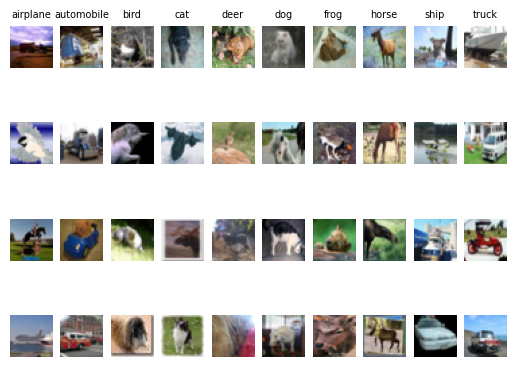

In [40]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB0 Tuned 14</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB0 Tuned 14):
1. Pre-Process Input
2. Import EfficientNetB0 Pre-Trained Model | Trainable = True
2. 3x Dense Layers w 1024/512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:100 
5. 3x Dropout (50%/30%/20%)
6. Early_Stopper(Patience=10)
7. Learning_Rate(Very Low)
8. Data Augmentation

### Difference from Baseline:
1. 3x Dropout (50%/30%/20%)
2. Batch Size:32 -> 64
3. Early_Stopper(Patience=10)
4. Learning_Rate(Very Low)
5. Trainable: False -> True
6. Data Augmentation
7. Epochs: 20 -> 100
8. 3x Dense Layers (2048/1024/512)
    
### Note:
    - Built off from Tuned 13

##  <font color= maroon> Data Preparation (Tuned 14) - EfficientNetB0 Re-Train

### 1. Load the CIFAR-10 Dataset

In [13]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [14]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [15]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [16]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [17]:
IMG_SIZE = 224

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 64

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 14) - EfficientNetB0 Re-Train

### 1. Define the Pre-Trained EfficientNetB0 Model

In [18]:
# Load the pre-trained EfficientNetB0 model
efficientnetb0_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the layers of the EfficientNetB0 model
for layer in efficientnetb0_model.layers:
    layer.trainable = True

16705208/16705208 [==============================] - 0s 0us/step


### 2. Print the Summary of the EfficientNetB0 Model

In [19]:
efficientnetb0_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

### 3. Build the Overall Model Architecture

In [20]:
# Create a new model that includes the EfficientNetB0 model and additional layers
model = Sequential()
model.add(efficientnetb0_model)
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2048)              128452608 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

##  <font color= maroon> Data Training (Tuned 14) - EfficientNetB0 Re-Train

### 1. Compile the Model

In [22]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [23]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback = []
def decay(epoch):
    return 0.001 / (1 + 1 * 30)

callback += [keras.callbacks.LearningRateScheduler(decay)]

model_log = model.fit(training_set, epochs=100, validation_data=test_set, callbacks=[early_stop, callback])

Epoch 1/100


2023-05-31 05:27:13.186841: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 388s 431ms/step - loss: 1.2845 - accuracy: 0.5582 - val_loss: 0.5108 - val_accuracy: 0.8262 - lr: 3.2258e-05
Epoch 2/100
782/782 [==============================] - 336s 429ms/step - loss: 0.7481 - accuracy: 0.7429 - val_loss: 0.3707 - val_accuracy: 0.8778 - lr: 3.2258e-05
Epoch 3/100
782/782 [==============================] - 322s 411ms/step - loss: 0.5895 - accuracy: 0.7974 - val_loss: 0.3072 - val_accuracy: 0.8974 - lr: 3.2258e-05
Epoch 4/100
782/782 [==============================] - 335s 429ms/step - loss: 0.5048 - accuracy: 0.8273 - val_loss: 0.2651 - val_accuracy: 0.9132 - lr: 3.2258e-05
Epoch 5/100
782/782 [==============================] - 335s 428ms/step - loss: 0.4324 - accuracy: 0.8524 - val_loss: 0.2430 - val_accuracy: 0.9193 - lr: 3.2258e-05
Epoch 6/100
782/782 [==============================] - 334s 428ms/step - loss: 0.3840 - accuracy: 0.8678 - val_loss: 0.2290 - val_accuracy: 0.9245 - lr: 3.2258e-05
Epoch 7/100
782/782 [=======

##  <font color= maroon> Data Evaluation (Tuned 14) - EfficientNetB0 Re-Train

### 1. Visualise the Performance

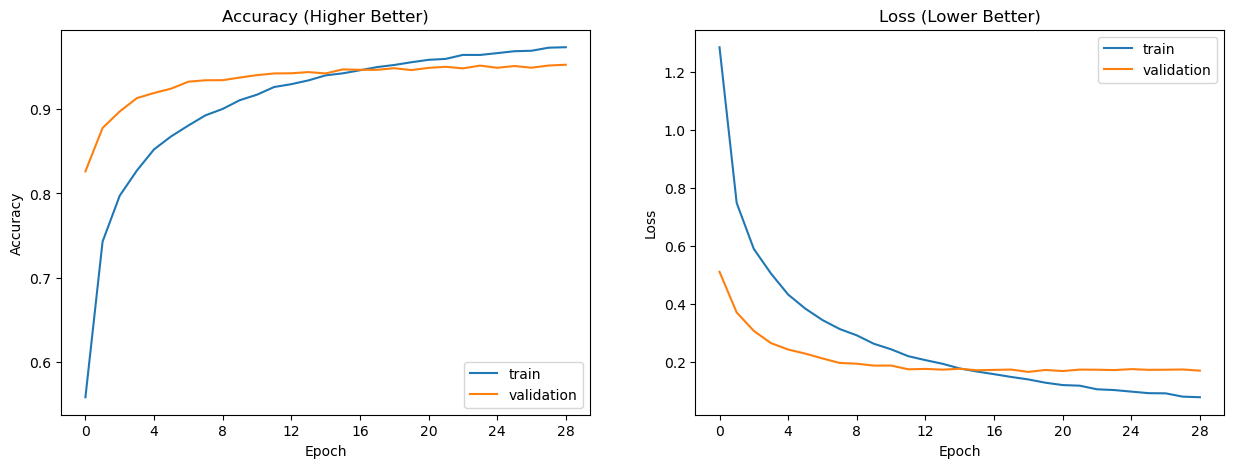

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [25]:
score = model.evaluate(test_set, verbose=0)

In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17028123140335083
Test accuracy: 0.9527999758720398


### 3. Visualise the Wrongly Classified Data

In [27]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

157/157 [==============================] - 12s 65ms/step
[3 8 8 ... 5 1 7]


In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [29]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

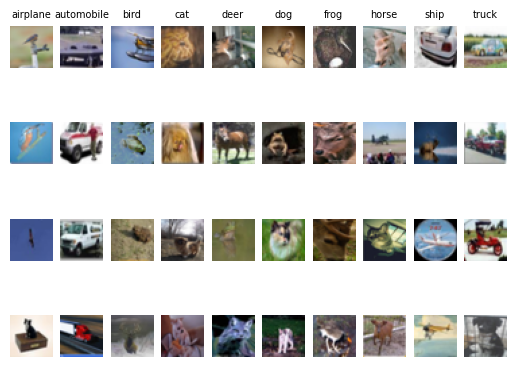

In [30]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)

<hr style="border:10px solid black"> 
<h1 style="text-align:center;">EfficientNetB2 Tuned 15</h1>
<hr style="border:10px solid black">

##  <font color= maroon> Description (EfficientNetB2 Tuned 15):
1. Pre-Process Input
2. Import EfficientNetB2 Pre-Trained Model | Trainable = True
2. 3x Dense Layers w 1024/512/256 Neurons using Relu Activation Function
3. Adam Optimizer
4. Batch Size:64 | Epochs:100 
5. 3x Dropout (50%/30%/20%)
6. Early_Stopper(Patience=10)
7. Learning_Rate(Very Low)
8. Data Augmentation

### Difference from Baseline:
1. 3x Dropout (50%/30%/20%)
2. Early_Stopper(Patience=10)
3. Learning_Rate(Very Low)
4. Trainable: False -> True
5. Data Augmentation
6. Epochs: 20 -> 100
7. 3x Dense Layers (1024/512/256)
8. EfficientNetB0 -> EfficientNetB2
    
### Note:
    - Built off from Tuned 13

##  <font color= maroon> Data Preparation (Tuned 15) - EfficientNetB2 Re-Train

### 1. Load the CIFAR-10 Dataset

In [70]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Convert class vectors to binary class matrices

In [71]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### 3. Check that it is converted correctly

In [72]:
print (y_test.shape)
print (y_test[:1,:])

(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


### 4. Preprocess the Data

In [73]:
x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

### 5. Reformat the Size

In [74]:
IMG_SIZE = 260

def format_image(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image) # Random horizontal flip
  image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)) # Random rotation
  image = tf.image.random_crop(image, size=[int(IMG_SIZE*0.9), int(IMG_SIZE*0.9), 3]) # Random crop to enable shift augmentation
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) # Resize back after crop
  
  return image, label

def format_image2(image, label):
  # Resize the image
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  return image, label

batch_size = 32

# Create TensorFlow Datasets for training and testing
training_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply resizing, normalization, and data augmentation
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image2).batch(batch_size).prefetch(1)

##  <font color= maroon> Data Building (Tuned 15) - EfficientNetB2 Re-Train

### 1. Define the Pre-Trained EfficientNetB2 Model

In [75]:
# Load the pre-trained EfficientNetB2 model
efficientnetb2_model = tf.keras.applications.EfficientNetB2(weights='imagenet', include_top=False, input_shape=(260, 260, 3))

# Freeze the layers of the EfficientNetB2 model
for layer in efficientnetb2_model.layers:
    layer.trainable = True

### 2. Print the Summary of the EfficientNetB2 Model

In [76]:
efficientnetb2_model.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_12 (Rescaling)       (None, 260, 260, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization_6 (Normalization  (None, 260, 260, 3)  7          ['rescaling_12[0][0]']           
 )                                                                                                
                                                                                     

### 3. Build the Overall Model Architecture

In [77]:
# Create a new model that includes the EfficientNetB4 model and additional layers
model = Sequential()
model.add(efficientnetb2_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### 4. Print the Summary of the Overall Model

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 9, 9, 1408)       7768569   
                                                                 
 flatten_6 (Flatten)         (None, 114048)            0         
                                                                 
 dense_24 (Dense)            (None, 1024)              116786176 
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)              

##  <font color= maroon> Data Training (Tuned 15) - EfficientNetB2 Re-Train

### 1. Compile the Model

In [79]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 2. Train the Model

In [80]:
#Define an Early Stopper
early_stop = EarlyStopping(monitor='val_loss', patience=10)

callback = []
def decay(epoch):
    return 0.001 / (1 + 1 * 30)

callback += [keras.callbacks.LearningRateScheduler(decay)]

model_log = model.fit(training_set, epochs=100, validation_data=test_set, callbacks=[early_stop, callback])

Epoch 1/100


2023-05-30 16:23:10.448210: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/efficientnetb2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 807s 477ms/step - loss: 1.2178 - accuracy: 0.5785 - val_loss: 0.4001 - val_accuracy: 0.8692 - lr: 3.2258e-05
Epoch 2/100
1563/1563 [==============================] - 745s 477ms/step - loss: 0.6743 - accuracy: 0.7766 - val_loss: 0.2686 - val_accuracy: 0.9100 - lr: 3.2258e-05
Epoch 3/100
1563/1563 [==============================] - 746s 477ms/step - loss: 0.5224 - accuracy: 0.8302 - val_loss: 0.2298 - val_accuracy: 0.9263 - lr: 3.2258e-05
Epoch 4/100
1563/1563 [==============================] - 746s 477ms/step - loss: 0.4371 - accuracy: 0.8587 - val_loss: 0.1993 - val_accuracy: 0.9336 - lr: 3.2258e-05
Epoch 5/100
1563/1563 [==============================] - 746s 477ms/step - loss: 0.3815 - accuracy: 0.8749 - val_loss: 0.1882 - val_accuracy: 0.9375 - lr: 3.2258e-05
Epoch 6/100
1563/1563 [==============================] - 745s 477ms/step - loss: 0.3256 - accuracy: 0.8943 - val_loss: 0.1818 - val_accuracy: 0.9397 - lr: 3.2258e-05
Epoch 7/100
1563

##  <font color= maroon> Data Evaluation (Tuned 15) - EfficientNetB2 Re-Train

### 1. Visualise the Performance

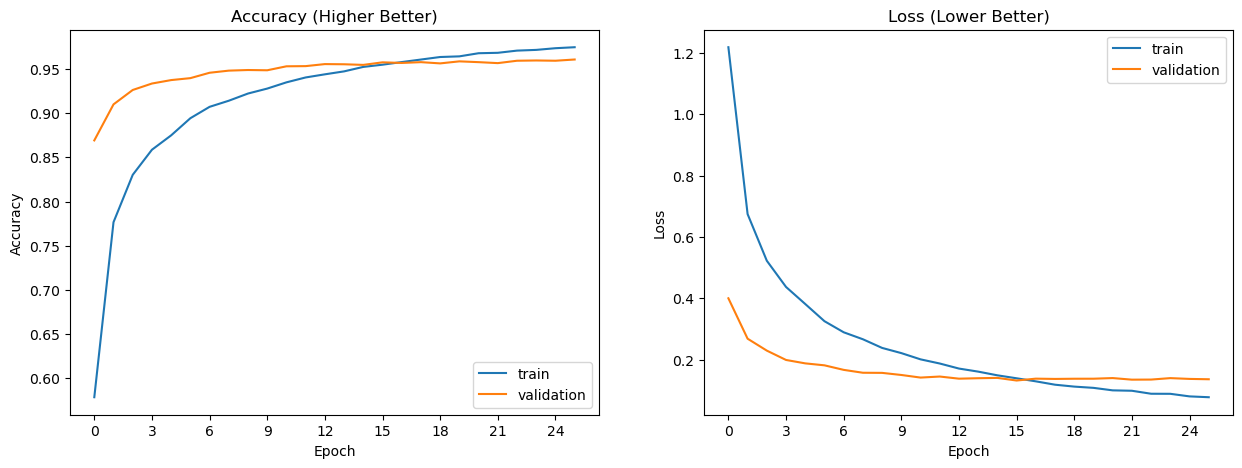

In [81]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

### 2. Evaluate the Model using Test Data

In [82]:
score = model.evaluate(test_set, verbose=0)

In [83]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13648423552513123
Test accuracy: 0.9607999920845032


### 3. Visualise the Wrongly Classified Data

In [84]:
predict_x = model.predict(test_set) 
output = np.argmax(predict_x,axis=1)
print(output)

313/313 [==============================] - 25s 72ms/step
[3 8 8 ... 5 1 7]


In [85]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ind = np.where(np.equal(output, y_test.flatten())==0)

In [86]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]

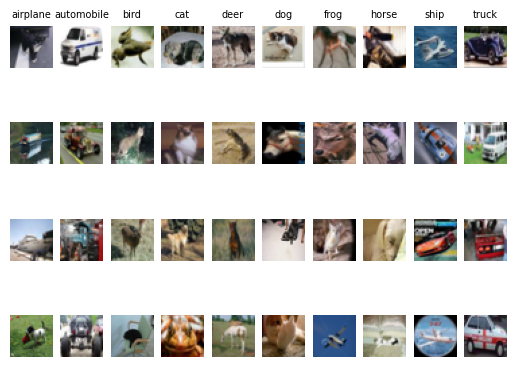

In [87]:
examples_per_class = 4

for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name, fontsize=7)


<h1 style="text-align:center;">References</h1>

### Activation Functions:
- https://www.v7labs.com/blog/neural-networks-activation-functions
- https://medium.com/@snaily16/what-why-and-which-activation-functions-b2bf748c0441
- https://towardsdatascience.com/the-dying-relu-problem-clearly-explained--42d0c54e0d24#:~:text=If%20our%20learning%20rate%20(%CE%B1,dying%20ReLU%20problem%20to%20happen
- https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

### Optimizers:
- https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=Gradient%20Descent%2C%20Stochastic%20Gradient%20Descent%2C%20Mini%2Dbatch%20Gradient%20Descent,all%20popular%20deep%2Dlearning%20optimizers
- https://keras.io/api/optimizers/sgd/

### Augmentation:
- https://www.tensorflow.org/tutorials/images/data_augmentation
- https://www.kaggle.com/code/mielek/data-augmentation-with-keras-using-cifar-10/notebook
- https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb
- https://www.youtube.com/watch?v=JI8saFjK84o&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=21

### Early Stopping:
- https://keras.io/api/callbacks/early_stopping/
- https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

### Regularization:
- https://www.youtube.com/watch?v=R0Dz8R0wgBs
- https://keras.io/api/layers/regularizers/
- https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer

### Mean Subtraction:
- https://www.quora.com/What-is-the-purpose-of-subtracting-the-mean-and-dividing-the-standard-deviation-from-the-data-set-to-standardize-it#:~:text=Subtracting%20the%20mean%20and%20then,on%20their%20variance%20and%20mean.
- https://stackoverflow.com/questions/44788133/how-does-mean-image-subtraction-work

### UpSampling2D:
- https://keras.io/api/layers/reshaping_layers/up_sampling2d/

### CNN:
- https://www.youtube.com/watch?v=pj9-rr1wDhM

### LeNet5:
- https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/
- https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide
- https://thecleverprogrammer.com/2021/10/09/lenet-5-architecture-using-python/

### VGGNet16:
- https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide
- https://medium.com/analytics-vidhya/vggnet-architecture-explained-e5c7318aa5b6
- https://www.youtube.com/watch?v=mRVTKrbRYi0
- https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/#:~:text=VGG16%20is%20a%20convolutional%20neural,for%20Large%2DScale%20Image%20Recognition.
- https://towardsdatascience.com/transfer-learning-in-tensorflow-5d2b6ad495cb
- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f
- https://github.com/PauloMorillo/holbertonschool-machine_learning/blob/master/supervised_learning/0x09-transfer_learning/0-transfer.py
- https://towardsdatascience.com/fine-tuning-pre-trained-model-vgg-16-1277268c537f

### AlexNet:
- https://medium.com/analytics-vidhya/concept-of-alexnet-convolutional-neural-network-6e73b4f9ee30#:~:text=the%20completion%20afterward.-,The%20Architecture%20of%20AlexNet,over%20the%201000%20class%20labels
- https://github.com/pravinkr/alexnet-cifar10-using-keras/blob/master/cifar_10_with_Alexnet.ipynb
- https://datascience.stackexchange.com/questions/29245/what-is-the-input-size-of-alex-net
- https://thecleverprogrammer.com/2021/12/13/alexnet-architecture-using-python/
- https://medium.datadriveninvestor.com/alexnet-implementation-using-keras-7c10d1bb6715

### InceptionV3:
- https://keras.io/api/applications/inceptionv3/
- https://ahlemkaabi1412.medium.com/transfer-learning-using-inceptionv3-keras-application-for-cifar-10-photo-classification-c3fbd8dd67a4
- https://www.kaggle.com/general/306900

### EfficientNet:
- https://keras.io/api/applications/efficientnet/
- https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/preprocess_input
- https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

### Transfer Learning:
- https://keras.io/api/applications/
- https://www.tensorflow.org/tutorials/images/transfer_learning
- https://www.youtube.com/watch?v=FQM13HkEfBk&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=21